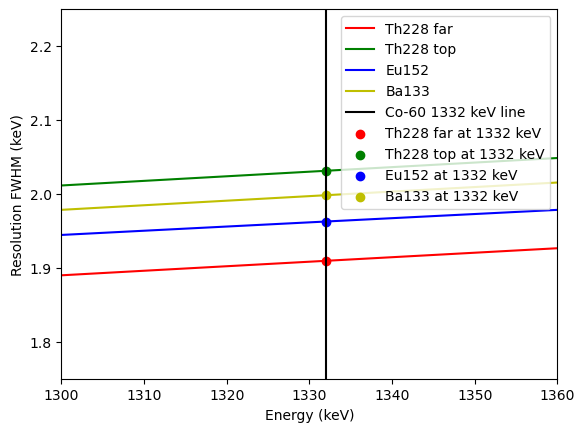

1.9095215216383397 2.031316718190445 1.9626792601951037 1.9982572394964568


In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Feb  6 15:14:55 2024

@author: aravindremesansreekala
"""

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.dates as md
import pandas as pd
from scipy.optimize import curve_fit

# Th_far, Th_top, Eu, Ba

a = [0.63, 0.92, 0.91, 0.89]
b = [2.2E-3, 2.3E-3, 2.2E-3, 2.2E-3]
c = [4.84E-8, 8.04E-8, 0.66E-8, 9.73E-8]
E_Co = 1332 #keV

#col = ['r', 'g', 'b']
x = np.linspace(1, 2700, 100)

def relresolFunc1(E, a,b,c):
    relresol = np.sqrt(a/E**2 + b/E + c)*E*0.01
    return relresol

plt.plot(x, 100*relresolFunc1(x, a[0], b[0] ,c[0]), color = 'r', label = 'Th228 far')
plt.plot(x, 100*relresolFunc1(x, a[1], b[1] ,c[1]), color = 'g', label = 'Th228 top')
plt.plot(x, 100*relresolFunc1(x, a[2], b[2] ,c[2]), color = 'b', label = 'Eu152')
plt.plot(x, 100*relresolFunc1(x, a[3], b[3] ,c[3]), color = 'y', label = 'Ba133')
E_Co = 1332
plt.axvline(E_Co, color = 'k', label = 'Co-60 1332 keV line')
plt.scatter(E_Co, 100*relresolFunc1(E_Co, a[0], b[0] ,c[0]), color = 'r', label = 'Th228 far at 1332 keV')
plt.scatter(E_Co, 100*relresolFunc1(E_Co, a[1], b[1] ,c[1]), color = 'g', label = 'Th228 top at 1332 keV')
plt.scatter(E_Co, 100*relresolFunc1(E_Co, a[2], b[2] ,c[2]), color = 'b', label = 'Eu152 at 1332 keV')
plt.scatter(E_Co, 100*relresolFunc1(E_Co, a[3], b[3] ,c[3]), color = 'y', label = 'Ba133 at 1332 keV')
plt.legend()
#plt.title('Energy Resolution Curves')
plt.xlabel('Energy (keV)')
plt.ylabel('Resolution FWHM (keV)')
plt.xlim(1300, 1360)
plt.ylim(1.75, 2.25)
plt.show()

Res_Thfar = relresolFunc1(E_Co, a[0], b[0], c[0])
Res_Thtop = relresolFunc1(E_Co, a[1], b[1], c[1])
Res_Eu = relresolFunc1(E_Co, a[2], b[2], c[2])
Res_Ba  = relresolFunc1(E_Co, a[3], b[3], c[3])
print(100*Res_Thfar, 100*Res_Thtop, 100*Res_Eu, 100*Res_Ba)

In [2]:
#Calibration curves
df_resid_Thfar = pd.read_csv("Thfar_resid.txt", sep = ',', skiprows = 0)
df_resid_Thtop = pd.read_csv("Thtop_resid.txt", sep = ',', skiprows = 0)
df_resid_Eu = pd.read_csv("Eu_resid.txt", sep = ',', skiprows = 0)
df_resid_Ba = pd.read_csv("Ba_resid.txt", sep = ',', skiprows = 0)

E_Th = df_resid_Thfar.e_lit
Th_resid_top = df_resid_Thtop.resid_Thtop
Th_resid_top_err = df_resid_Thtop.resid_Thtop_err
Th_resid_far = df_resid_Thfar.resid_Thfar
Th_resid_far_err = df_resid_Thfar.resid_Thfar_err

E_Eu = df_resid_Eu.e_lit
Eu_resid = df_resid_Eu.resid_Eu
Eu_resid_err = df_resid_Eu.resid_Eu_err

E_Ba = df_resid_Ba.e_lit
Ba_resid = df_resid_Ba.resid_Ba
Ba_resid_err = df_resid_Ba.resid_Ba_err

Th_peakpos_top = df_resid_Thtop.peak_position
Th_peakpos_far = df_resid_Thfar.peak_position
Eu_peakpos = df_resid_Eu.peak_position
Ba_peakpos = df_resid_Ba.peak_position

a = [6.101, 6.1, 6.099, 6.103]
b =[-2.834, -3.249, -3.204, -3.443]
E = np.linspace(200, 2700, 100)


In [3]:
def calfunc(E, a, b):
    return a*E + b

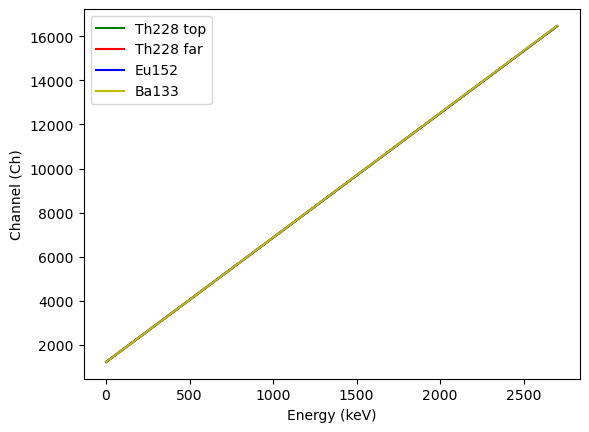

In [4]:
plt.plot(x, calfunc(E, a[0], b[0]), color = 'g', label = 'Th228 top')
plt.plot(x, calfunc(E, a[1], b[1]), color = 'r', label = 'Th228 far')
plt.plot(x, calfunc(E, a[2], b[2]), color = 'b', label = 'Eu152')
plt.plot(x, calfunc(E, a[3], b[3]), color = 'y', label = 'Ba133')
plt.legend()
plt.xlabel('Energy (keV)')
plt.ylabel('Channel (Ch)')
plt.show()

/var/folders/f4/949b_j_s5xsdh37vbkg_3j2r0000gn/T/ipykernel_87709/985540128.py:18: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  ax1.errorbar(E_Th, Th_resid_top, Th_resid_top_err, color = 'g', marker = '.', fmt = '.', label = 'Th228_top')
/var/folders/f4/949b_j_s5xsdh37vbkg_3j2r0000gn/T/ipykernel_87709/985540128.py:19: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  ax1.errorbar(E_Th, Th_resid_far, Th_resid_far_err, color = 'r', marker = '.', fmt = '.', label = 'Th228_far')
/var/folders/f4/949b_j_s5xsdh37vbkg_3j2r0000gn/T/ipykernel_87709/985540128.py:20: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  ax1.errorbar(E_Eu, Eu_resid, Eu_resid_err, color = 

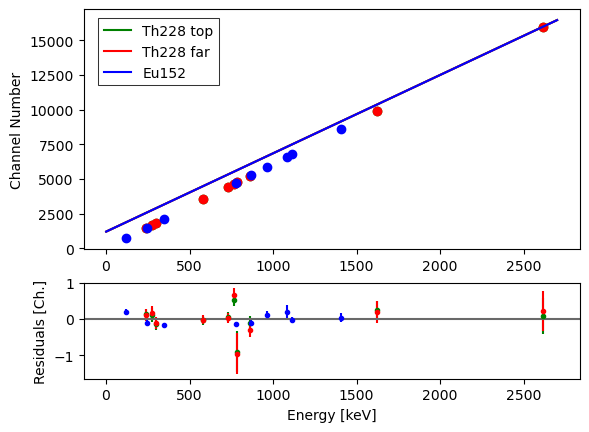

In [5]:
fig = plt.figure()
gs = gridspec.GridSpec(2, 1, height_ratios=[2.5, 1]) 

ax0 = plt.subplot(gs[0])
ax0.plot(x, calfunc(E, a[0], b[0]), color = 'g', label = 'Th228 top')
ax0.plot(x, calfunc(E, a[1], b[1]), color = 'r', label = 'Th228 far')
ax0.plot(x, calfunc(E, a[2], b[2]), color = 'b', label = 'Eu152')
#ax0.plot(x, calfunc(E, a[3], b[3]), color = 'y', label = 'Ba133')
ax0.scatter(E_Th, Th_peakpos_top, color = 'g')
ax0.scatter(E_Th, Th_peakpos_far, color = 'r')
ax0.scatter(E_Eu, Eu_peakpos, color = 'b')
#ax0.scatter(E_Ba, Ba_peakpos, color = 'y')

ax0.set_ylabel('Channel Number')
#ax0.set_ylim(0, 16383)

ax1 = plt.subplot(gs[1], sharex = ax0)
ax1.errorbar(E_Th, Th_resid_top, Th_resid_top_err, color = 'g', marker = '.', fmt = '.', label = 'Th228_top')
ax1.errorbar(E_Th, Th_resid_far, Th_resid_far_err, color = 'r', marker = '.', fmt = '.', label = 'Th228_far')
ax1.errorbar(E_Eu, Eu_resid, Eu_resid_err, color = 'b', marker = '.', fmt = '.', label = 'Eu152')
#ax1.errorbar(E_Ba, Ba_resid, Ba_resid_err, color = 'y', marker = '.', fmt = '.', label = 'Ba133')
ax1.set_yticks(np.arange(-1, 1.1, step=1))
ax1.set_xlabel('Energy [keV]')
ax1.set_ylabel('Residuals [Ch.]')
ax1.axhline(y = 0, color = 'dimgray')
legend = ax0.legend(loc=2, bbox_to_anchor=(0.015,0.99), frameon=True, shadow=False, edgecolor='black', fancybox=False)
legend.get_frame().set_linewidth(0.75)
plt.show()

In [6]:
#Calibration curve mean
print(a, b)
a_mean = np.mean(a)
b_mean = np.mean(b)
Th_resid_avg = []
Th_resid_err_avg = []
for i in range(len(Th_resid_top)):
    Th_resid_avg.append(0.5*(Th_resid_top[i] + Th_resid_far[i]))
    Th_resid_err_avg.append(0.5*(Th_resid_top_err[i] + Th_resid_far_err[i]))
print(Th_resid_avg, Th_resid_err_avg)

[6.101, 6.1, 6.099, 6.103] [-2.834, -3.249, -3.204, -3.443]
[0.1254122294862805, 0.1423380728062724, -0.11483872937760445, -0.0287869837198233, 0.0484221260036699, 0.5991646371958202, -0.9238833929660958, -0.19892318624583072, 0.21193729259103478, 0.14959324389808076] [0.1526517462599633, 0.19068055912069898, 0.16100730498725374, 0.12173456846365725, 0.13860007120541756, 0.17603667658177946, 0.5639569260720361, 0.1828302329507156, 0.2857479718254914, 0.5169783178604035]


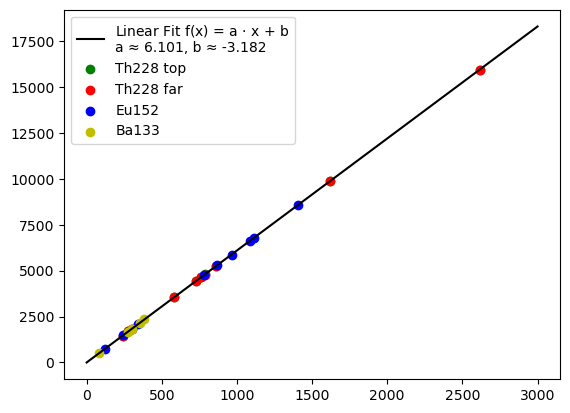

In [7]:
x_lim = np.linspace(0, 3000, 100)
plt.plot(x_lim, calfunc(x_lim, a_mean, b_mean), color = 'k', label = 'Linear Fit f(x) = a $\cdot$ x + b\na ≈ '+str(round(a_mean,3))+', b ≈ '+str(round(b_mean,3)))
plt.scatter(E_Th, Th_peakpos_top, color = 'g', label = 'Th228 top')
plt.scatter(E_Th, Th_peakpos_far, color = 'r', label = 'Th228 far')
plt.scatter(E_Eu, Eu_peakpos, color = 'b', label = 'Eu152')
plt.scatter(E_Ba, Ba_peakpos, color = 'y', label = 'Ba133')
plt.legend()
plt.show()

/var/folders/f4/949b_j_s5xsdh37vbkg_3j2r0000gn/T/ipykernel_87709/1900983380.py:16: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  ax1.errorbar(E_Th, Th_resid_avg, Th_resid_err_avg, color = 'r', marker = '.', fmt = '.', label = 'Th228')
/var/folders/f4/949b_j_s5xsdh37vbkg_3j2r0000gn/T/ipykernel_87709/1900983380.py:17: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  ax1.errorbar(E_Eu, Eu_resid, Eu_resid_err, color = 'b', marker = '.', fmt = '.', label = 'Eu152')
/var/folders/f4/949b_j_s5xsdh37vbkg_3j2r0000gn/T/ipykernel_87709/1900983380.py:18: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  ax1.errorbar(E_Ba, Ba_resid, Ba_resid_err, color = 'y', marker =

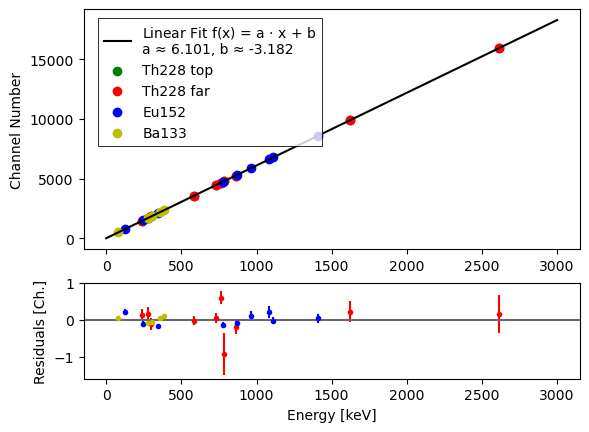

In [8]:
fig = plt.figure()
gs = gridspec.GridSpec(2, 1, height_ratios=[2.5, 1]) 

ax0 = plt.subplot(gs[0])
x_lim = np.linspace(0, 3000, 100)
ax0.plot(x_lim, calfunc(x_lim, a_mean, b_mean), color = 'k', label = 'Linear Fit f(x) = a $\cdot$ x + b\na ≈ '+str(round(a_mean,3))+', b ≈ '+str(round(b_mean,3)))
ax0.scatter(E_Th, Th_peakpos_top, color = 'g', label = 'Th228 top')
ax0.scatter(E_Th, Th_peakpos_far, color = 'r', label = 'Th228 far')
ax0.scatter(E_Eu, Eu_peakpos, color = 'b', label = 'Eu152')
ax0.scatter(E_Ba, Ba_peakpos, color = 'y', label = 'Ba133')

ax0.set_ylabel('Channel Number')
#ax0.set_ylim(0, 16383)

ax1 = plt.subplot(gs[1], sharex = ax0)
ax1.errorbar(E_Th, Th_resid_avg, Th_resid_err_avg, color = 'r', marker = '.', fmt = '.', label = 'Th228')
ax1.errorbar(E_Eu, Eu_resid, Eu_resid_err, color = 'b', marker = '.', fmt = '.', label = 'Eu152')
ax1.errorbar(E_Ba, Ba_resid, Ba_resid_err, color = 'y', marker = '.', fmt = '.', label = 'Ba133')
ax1.set_yticks(np.arange(-1, 1.1, step=1))
ax1.set_xlabel('Energy [keV]')
ax1.set_ylabel('Residuals [Ch.]')
ax1.axhline(y = 0, color = 'dimgray')
legend = ax0.legend(loc=2, bbox_to_anchor=(0.015,0.99), frameon=True, shadow=False, edgecolor='black', fancybox=False)
legend.get_frame().set_linewidth(0.75)
plt.show()

In [9]:
#Calibration with points from Th228 and Eu152
df_Th228_far = pd.read_csv("Th228_far_calib.txt", sep = ',', skiprows = 0, usecols = (1,2,3,4,5,6,7,8,9))
df_Th228_top = pd.read_csv("Th228_top_calib.txt", sep = ',', skiprows = 0, usecols = (1,2,3,4,5,6,7,8,9))
df_Eu152 = pd.read_csv("Eu152_calib.txt", sep = ',', skiprows = 0, usecols = (1,2,3,4,5,6,7,8,9))
df_Ba133 = pd.read_csv("Ba133_calib.txt", sep = ',', skiprows = 0, usecols = (1,2,3,4,5,6,7,8,9))

In [10]:
merge1 = [df_Th228_top, df_Eu152, df_Ba133]
df_calibration1 = pd.concat(merge1).sort_values(by=['e_lit'])
df_calibration1

,name,e_lit,e_err_lit,peak_position,peak_position_unc,peak_width,peak_width_unc,chi2_dof,channel_max
0,Cs81,80.9971,0.0014,490.856144,0.034388,2.677955,0.027247,10.298503,491.0
0,Sm121,121.7817,0.0003,739.298120,0.016317,2.832401,0.014582,3.668584,739.0
0,Pb238,238.6320,0.0020,1452.990668,0.010876,3.141510,0.009761,4.513262,1453.0
1,Sm244,244.6974,0.0008,1489.228772,0.017237,3.089143,0.015242,1.274340,1489.0
1,Cs276,276.3980,0.0020,1683.530739,0.050117,3.228864,0.048764,1.692274,1684.0
1,Tl277,277.3700,0.0200,1689.357801,0.049038,3.267484,0.034729,1.073887,1689.0
2,Pb300,300.0890,0.0120,1828.229959,0.026557,3.319151,0.027810,0.938595,1828.0
2,Cs302,302.8530,0.0010,1844.960012,0.013721,3.230753,0.011117,2.197306,1845.0
2,Gd344,344.2785,0.0012,2096.608284,0.011595,3.351679,0.009783,1.948236,2097.0
3,Cs356,356.0170,0.0020,2169.320046,0.018267,3.390593,0.014120,10.869287,2169.0


In [11]:
def linFunc(E, m,q):
    lin = m*E+q
    return lin

In [12]:
popt, pcov = curve_fit(linFunc, df_calibration1.peak_position, df_calibration1.e_lit, 
                       p0=[np.median(df_calibration1.e_lit/df_calibration1.peak_position), 0], 
                       bounds=((0, -np.inf),
                               (+np.inf, +np.inf)), 
                       sigma=df_calibration1.peak_width, maxfev=10000)

cal_CE_a = popt[0]
print(cal_CE_a)
cal_CE_a_err = np.sqrt(pcov[0, 0])
print(cal_CE_a_err)
cal_CE_b = popt[1]
print('')
print(cal_CE_b)
cal_CE_b_err = np.sqrt(pcov[1, 1])
print(cal_CE_b_err)
cal_CE_cov_ab = pcov[0, 1]
cal_CE = (cal_CE_a, cal_CE_b)

cal_EC_a = 1/cal_CE_a
cal_EC_b = -cal_CE_b/cal_CE_a
cal_EC = (cal_EC_a, cal_EC_b)

print(popt, pcov)

0.16393077392669136
1.3945292296294554e-05

0.486520365819466
0.05596031269721591
[0.16393077 0.48652037] [[ 1.94471177e-10 -6.00336172e-07]
 [-6.00336172e-07  3.13155660e-03]]


In [13]:
reconstr_e = linFunc(df_calibration1.peak_position, *cal_CE)
df_calibration1['reconstr_e'] = reconstr_e
reconstr_e_err = np.sqrt(cal_CE_b_err**2 + (cal_CE_a_err*df_calibration1.peak_position)**2 + 2*(df_calibration1.peak_position)*cal_CE_cov_ab)
residuals_e = reconstr_e - df_calibration1.e_lit
residuals_e_err = np.sqrt(reconstr_e_err**2 + (df_calibration1.e_err_lit)**2)
print(residuals_e, residuals_e_err)

0   -0.044152
0   -0.101467
0    0.044405
1   -0.080455
1    0.071017
1    0.054252
2    0.100673
2    0.079243
2   -0.093361
3    0.087834
4    0.093154
3    0.138033
4    0.147942
5    0.079292
3   -0.204967
6    0.316393
7    0.201382
4   -0.233001
5   -0.288393
6   -0.335649
7   -0.303861
8   -0.386464
8    0.288782
9    0.502641
dtype: float64 0    0.050902
0    0.048480
0    0.042445
1    0.042136
1    0.040809
1    0.045367
2    0.041599
2    0.039741
2    0.038347
3    0.038027
4    0.037364
3    0.036400
4    0.041612
5    0.046435
3    0.042633
6    0.099711
7    0.050854
4    0.047279
5    0.055815
6    0.065423
7    0.062810
8    0.084634
8    0.101817
9    0.183166
dtype: float64


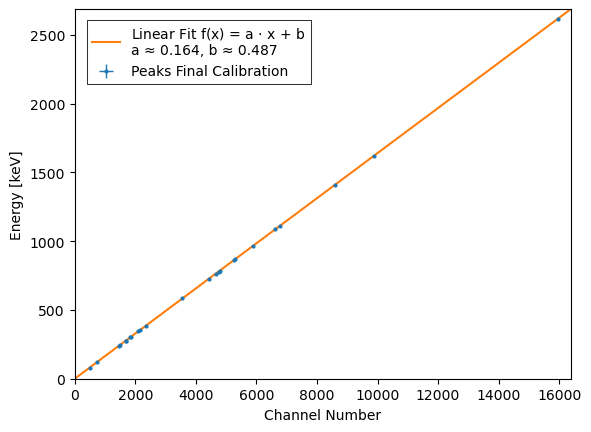

In [14]:
plt.errorbar(df_calibration1.peak_position, df_calibration1.e_lit, 
             xerr = df_calibration1.peak_width, yerr = df_calibration1.e_err_lit,
             fmt = 'o', ms = 2, label = 'Peaks Final Calibration', linewidth=1)
plt.plot(np.linspace(0,16383,10), linFunc(np.linspace(0,16383,10), *popt), 
         label = 'Linear Fit f(x) = a $\cdot$ x + b\na ≈ '+str(round(popt[0],3))+', b ≈ '+str(round(popt[1],3)))
plt.xlabel('Channel Number')
plt.ylabel('Energy [keV]')
#plt.xscale('log'); plt.yscale('log');
plt.xlim(0, 16383)
plt.ylim(0, linFunc(16383, *popt))
legend = plt.legend(loc=2, bbox_to_anchor=(0.01,0.99), frameon=True, shadow=False, edgecolor='black', fancybox=False)
legend.get_frame().set_linewidth(0.75)
plt.show()

In [15]:
chi2 = np.sum(residuals_e**2 / residuals_e_err**2)
print(chi2)
dof = len(residuals_e)-len(popt)
print(dof)

257.5798740442429
22


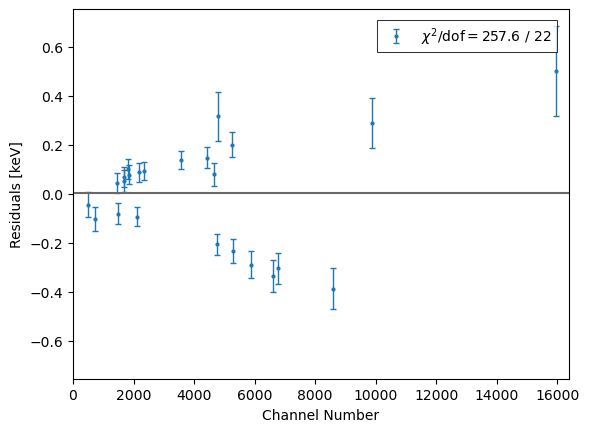

In [16]:
plt.errorbar(df_calibration1.peak_position, residuals_e, yerr = residuals_e_err,
             fmt='o', ms=2, capsize=2, linewidth = 1, label = '$\chi^2 / \mathrm{dof} = $'+str(round(chi2,1))+' / '+str(int(dof)))
plt.axhline(y=np.mean(residuals_e), color = 'dimgray')
plt.xlabel('Channel Number')
plt.ylabel('Residuals [keV]')
val_lim = max(np.abs(1.1*np.max(residuals_e+residuals_e_err)), np.abs(1.1*np.min(residuals_e-residuals_e_err)))
plt.xlim(0, 16383)
plt.ylim(-val_lim, val_lim)
legend = plt.legend(loc=1, bbox_to_anchor=(0.99,0.99), frameon=True, shadow=False, edgecolor='black', fancybox=False)
legend.get_frame().set_linewidth(0.75)
plt.show()

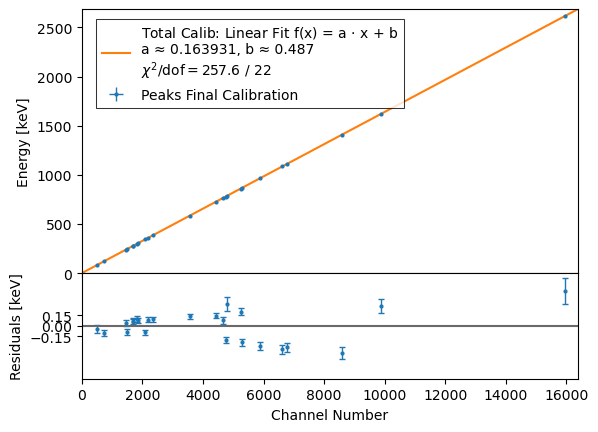

In [17]:
fig = plt.figure()
gs = gridspec.GridSpec(2, 1, height_ratios=[2.5, 1]) 

ax0 = plt.subplot(gs[0])
ax0.errorbar(df_calibration1.peak_position, df_calibration1.e_lit, 
             xerr = df_calibration1.peak_width, yerr = df_calibration1.e_err_lit,
             fmt = 'o', ms = 2, label = 'Peaks Final Calibration', linewidth=1)
ax0.plot(np.linspace(0,16383,10), linFunc(np.linspace(0,16383,10), *popt), 
         label = 'Total Calib: Linear Fit f(x) = a $\cdot$ x + b\na ≈ '+str(round(popt[0],6))+', b ≈ '+str(round(popt[1],3))+
         '\n$\chi^2 / \mathrm{dof} = $'+str(round(chi2,1))+' / '+str(int(dof)))
ax0.set_ylabel('Energy [keV]')
ax0.set_ylim(0, linFunc(16383, *popt))

ax1 = plt.subplot(gs[1], sharex = ax0)
ax1.errorbar(df_calibration1.peak_position, residuals_e, yerr = residuals_e_err,
             fmt='o', ms=2, capsize=2, linewidth = 1, label = '$\chi^2 / \mathrm{dof} = $'+str(round(chi2,1))+' / '+str(int(dof)))
ax1.axhline(y=np.mean(residuals_e), color = 'dimgray')
plt.setp(ax0.get_xticklabels(), visible=False)
yticks = ax1.yaxis.get_major_ticks()
#yticks[-1].label1.set_visible(False)
ax1.set_xlabel('Channel Number')
ax1.set_ylabel('Residuals [keV]')
val_lim = max(np.abs(1.1*np.max(residuals_e+residuals_e_err)), np.abs(1.1*np.min(residuals_e-residuals_e_err)))
ax1.set_ylim(-val_lim, val_lim)
ax1.set_yticks(np.arange(-0.15, 0.16, step=0.15))
plt.xlim(0, 16383)

legend = ax0.legend(loc=2, bbox_to_anchor=(0.015,0.99), frameon=True, shadow=False, edgecolor='black', fancybox=False)
legend.get_frame().set_linewidth(0.75)

plt.subplots_adjust(hspace=.0)
plt.show()

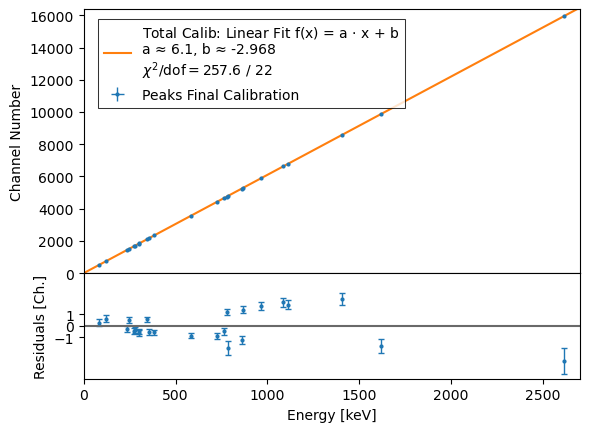

,name,e_lit,e_err_lit,peak_position,peak_position_unc,peak_width,peak_width_unc,chi2_dof,channel_max,reconstr_e
0,Cs81,80.9971,0.0014,490.856144,0.034388,2.677955,0.027247,10.298503,491.0,80.952948
0,Sm121,121.7817,0.0003,739.298120,0.016317,2.832401,0.014582,3.668584,739.0,121.680233
0,Pb238,238.6320,0.0020,1452.990668,0.010876,3.141510,0.009761,4.513262,1453.0,238.676405
1,Sm244,244.6974,0.0008,1489.228772,0.017237,3.089143,0.015242,1.274340,1489.0,244.616945
1,Cs276,276.3980,0.0020,1683.530739,0.050117,3.228864,0.048764,1.692274,1684.0,276.469017
1,Tl277,277.3700,0.0200,1689.357801,0.049038,3.267484,0.034729,1.073887,1689.0,277.424252
2,Pb300,300.0890,0.0120,1828.229959,0.026557,3.319151,0.027810,0.938595,1828.0,300.189673
2,Cs302,302.8530,0.0010,1844.960012,0.013721,3.230753,0.011117,2.197306,1845.0,302.932243
2,Gd344,344.2785,0.0012,2096.608284,0.011595,3.351679,0.009783,1.948236,2097.0,344.185139
3,Cs356,356.0170,0.0020,2169.320046,0.018267,3.390593,0.014120,10.869287,2169.0,356.104834


In [18]:
fig = plt.figure()
gs = gridspec.GridSpec(2, 1, height_ratios=[2.5, 1]) 

ax0 = plt.subplot(gs[0])
ax0.errorbar(df_calibration1.e_lit, df_calibration1.peak_position, 
             yerr = df_calibration1.peak_width, xerr = df_calibration1.e_err_lit,
             fmt = 'o', ms = 2, label = 'Peaks Final Calibration', linewidth=1)
#ax0.plot(x_lim, calfunc(x_lim, a_mean, b_mean), color = 'k', label = 'Mean Calib: Linear Fit f(x) = a $\cdot$ x + b\na ≈ '+str(round(a_mean,3))+', b ≈ '+str(round(b_mean,3)))

ax0.plot(np.linspace(0,2700,10), linFunc(np.linspace(0,2700,10), *cal_EC), 
         label = 'Total Calib: Linear Fit f(x) = a $\cdot$ x + b\na ≈ '+str(round(cal_EC[0],3))+', b ≈ '+str(round(cal_EC[1],3))+
         '\n$\chi^2 / \mathrm{dof} = $'+str(round(chi2,1))+' / '+str(int(dof)))
ax0.set_ylabel('Channel Number')
ax0.set_ylim(0, 16383)

ax1 = plt.subplot(gs[1], sharex = ax0)
ax1.errorbar(df_calibration1.e_lit, -cal_EC_a*residuals_e, yerr = cal_EC_a*residuals_e_err,
             fmt='o', ms=2, capsize=2, linewidth = 1, label = '$\chi^2 / \mathrm{dof} = $'+str(round(chi2,1))+' / '+str(int(dof)))
ax1.axhline(y=np.mean(-cal_EC_a*residuals_e), color = 'dimgray')
plt.setp(ax0.get_xticklabels(), visible=False)
yticks = ax1.yaxis.get_major_ticks()
#yticks[-1].label1.set_visible(False)
ax1.set_xlabel('Energy [keV]')
ax1.set_ylabel('Residuals [Ch.]')
val_lim = max(np.abs(1.1*np.max(cal_EC_a*(residuals_e+residuals_e_err))), np.abs(1.1*np.min(cal_EC_a*(residuals_e-residuals_e_err))))
ax1.set_ylim(-val_lim, val_lim)
ax1.set_yticks(np.arange(-1, 1.1, step=1))
plt.xlim(0, 2700)

legend = ax0.legend(loc=2, bbox_to_anchor=(0.015,0.99), frameon=True, shadow=False, edgecolor='black', fancybox=False)
legend.get_frame().set_linewidth(0.75)

plt.subplots_adjust(hspace=.0)
plt.show()
df_calibration1

In [19]:
isotope_list = []
for i in df_calibration1['name']:
    if i.find('Tl') > -1:
        isotope_list.append('$^{208}$Tl')
    elif i.find('Bi') > -1:
        isotope_list.append('$^{212}$Bi')
    elif i.find('Pb') > -1:
        isotope_list.append('$^{212}$Pb')
    if i.find('Sm') == 0:
        isotope_list.append('$^{152}$Sm')
    elif i.find('Gd') == 0:
        isotope_list.append('$^{152}$Gd')
    elif i.find('Cs') == 0:
        isotope_list.append('$^{133}$Cs')
df_calibration1['isotope'] = isotope_list
df_calibration1

,name,e_lit,e_err_lit,peak_position,peak_position_unc,peak_width,peak_width_unc,chi2_dof,channel_max,reconstr_e,isotope
0,Cs81,80.9971,0.0014,490.856144,0.034388,2.677955,0.027247,10.298503,491.0,80.952948,$^{133}$Cs
0,Sm121,121.7817,0.0003,739.298120,0.016317,2.832401,0.014582,3.668584,739.0,121.680233,$^{152}$Sm
0,Pb238,238.6320,0.0020,1452.990668,0.010876,3.141510,0.009761,4.513262,1453.0,238.676405,$^{212}$Pb
1,Sm244,244.6974,0.0008,1489.228772,0.017237,3.089143,0.015242,1.274340,1489.0,244.616945,$^{152}$Sm
1,Cs276,276.3980,0.0020,1683.530739,0.050117,3.228864,0.048764,1.692274,1684.0,276.469017,$^{133}$Cs
1,Tl277,277.3700,0.0200,1689.357801,0.049038,3.267484,0.034729,1.073887,1689.0,277.424252,$^{208}$Tl
2,Pb300,300.0890,0.0120,1828.229959,0.026557,3.319151,0.027810,0.938595,1828.0,300.189673,$^{212}$Pb
2,Cs302,302.8530,0.0010,1844.960012,0.013721,3.230753,0.011117,2.197306,1845.0,302.932243,$^{133}$Cs
2,Gd344,344.2785,0.0012,2096.608284,0.011595,3.351679,0.009783,1.948236,2097.0,344.185139,$^{152}$Gd
3,Cs356,356.0170,0.0020,2169.320046,0.018267,3.390593,0.014120,10.869287,2169.0,356.104834,$^{133}$Cs


/var/folders/f4/949b_j_s5xsdh37vbkg_3j2r0000gn/T/ipykernel_87709/1550701662.py:21: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  ax1.errorbar(E_Eu, Eu_resid, Eu_resid_err, color = 'b', marker = '.', fmt = '.')
/var/folders/f4/949b_j_s5xsdh37vbkg_3j2r0000gn/T/ipykernel_87709/1550701662.py:22: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  ax1.errorbar(E_Th, Th_resid_far, Th_resid_far_err, color = 'r', marker = '.', fmt = '.')
/var/folders/f4/949b_j_s5xsdh37vbkg_3j2r0000gn/T/ipykernel_87709/1550701662.py:23: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  ax1.errorbar(E_Ba, Ba_resid, Ba_resid_err, color = 'y', marker = '.', fmt = '.')


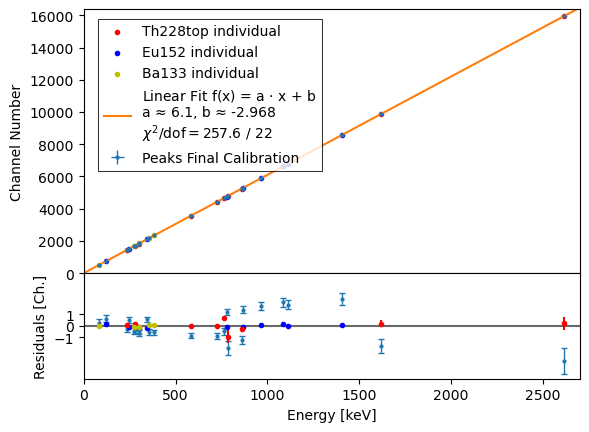

In [20]:
fig = plt.figure()
gs = gridspec.GridSpec(2, 1, height_ratios=[2.5, 1]) 

ax0 = plt.subplot(gs[0])
ax0.scatter(E_Th, Th_peakpos_far, color = 'r', marker = '.', label = 'Th228top individual')
ax0.scatter(E_Eu, Eu_peakpos, color = 'b', marker = '.', label = 'Eu152 individual')
ax0.scatter(E_Ba, Ba_peakpos, color = 'y', marker = '.', label = 'Ba133 individual')
ax0.errorbar(df_calibration1.e_lit, df_calibration1.peak_position, 
             yerr = df_calibration1.peak_width, xerr = df_calibration1.e_err_lit,
             fmt = 'o', ms = 2, label = 'Peaks Final Calibration', linewidth=1)
ax0.plot(np.linspace(0,2700,10), linFunc(np.linspace(0,2700,10), *cal_EC), 
         label = 'Linear Fit f(x) = a $\cdot$ x + b\na ≈ '+str(round(cal_EC[0],3))+', b ≈ '+str(round(cal_EC[1],3))+
         '\n$\chi^2 / \mathrm{dof} = $'+str(round(chi2,1))+' / '+str(int(dof)))
ax0.set_ylabel('Channel Number')
ax0.set_ylim(0, 16383)

ax1 = plt.subplot(gs[1], sharex = ax0)
ax1.errorbar(df_calibration1.e_lit, -cal_EC_a*residuals_e, yerr = cal_EC_a*residuals_e_err,
             fmt='o', ms=2, capsize=2, linewidth = 1, label = '$\chi^2 / \mathrm{dof} = $'+str(round(chi2,1))+' / '+str(int(dof)))
ax1.axhline(y=np.mean(-cal_EC_a*residuals_e), color = 'dimgray')
ax1.errorbar(E_Eu, Eu_resid, Eu_resid_err, color = 'b', marker = '.', fmt = '.')
ax1.errorbar(E_Th, Th_resid_far, Th_resid_far_err, color = 'r', marker = '.', fmt = '.')
ax1.errorbar(E_Ba, Ba_resid, Ba_resid_err, color = 'y', marker = '.', fmt = '.')
plt.setp(ax0.get_xticklabels(), visible=False)
yticks = ax1.yaxis.get_major_ticks()
#yticks[-1].label1.set_visible(False)
ax1.set_xlabel('Energy [keV]')
ax1.set_ylabel('Residuals [Ch.]')
val_lim = max(np.abs(1.1*np.max(cal_EC_a*(residuals_e+residuals_e_err))), np.abs(1.1*np.min(cal_EC_a*(residuals_e-residuals_e_err))))
ax1.set_ylim(-val_lim, val_lim)
ax1.set_yticks(np.arange(-1, 1.1, step=1))
plt.xlim(0, 2700)

legend = ax0.legend(loc=2, bbox_to_anchor=(0.015,0.99), frameon=True, shadow=False, edgecolor='black', fancybox=False)
legend.get_frame().set_linewidth(0.75)
plt.subplots_adjust(hspace=.0)
plt.show()

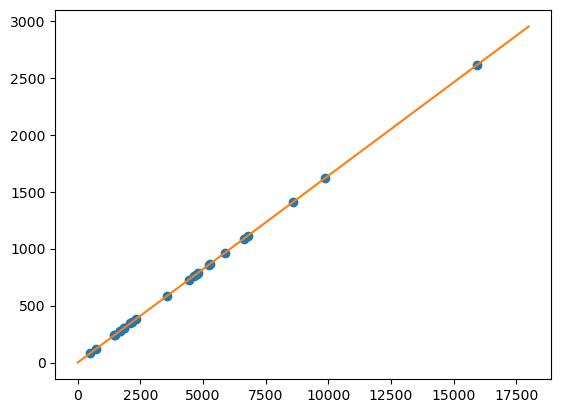

-5.57736821387363e-09 0.1639981637441397 0.3595954293305985
            2
-5.577e-09 x + 0.164 x + 0.3596


In [21]:
x = df_calibration1.peak_position
y = df_calibration1.e_lit
p = np.poly1d( np.polyfit(x, y, 2) )
t = np.linspace(0, 18000, 18000)
plt.plot(x, y, 'o', t, p(t), '-')
plt.show()
print(p[2], p[1], p[0])
print(p)

In [22]:
def quadFunc(E, a, b, c):
    quad = a*E**2 + b*E + c
    return quad

In [23]:
reconstr_e = quadFunc(df_calibration1.peak_position, *p)
df_calibration1['reconstr_e_quad'] = reconstr_e
#reconstr_e_err = np.sqrt(cal_CE_b_err**2 + (cal_CE_a_err*df_calibration1.peak_position)**2 + 2*(df_calibration1.peak_position)*cal_CE_cov_ab)
residuals_e = reconstr_e - df_calibration1.e_lit
#residuals_e_err = np.sqrt(reconstr_e_err**2 + (df_calibration1.e_err_lit)**2)
print(residuals_e)
df_calibration1

0   -0.139342
0   -0.181619
0    0.003622
1   -0.119390
1    0.041737
1    0.025255
2    0.078310
2    0.057665
2   -0.103513
3    0.080853
4    0.093347
3    0.180203
4    0.210184
5    0.145206
3   -0.137670
6    0.384295
7    0.274506
4   -0.159539
5   -0.211907
6   -0.260871
7   -0.230258
8   -0.345875
8    0.283001
9    0.031801
dtype: float64


,name,e_lit,e_err_lit,peak_position,peak_position_unc,peak_width,peak_width_unc,chi2_dof,channel_max,reconstr_e,isotope,reconstr_e_quad
0,Cs81,80.9971,0.0014,490.856144,0.034388,2.677955,0.027247,10.298503,491.0,80.952948,$^{133}$Cs,80.857758
0,Sm121,121.7817,0.0003,739.298120,0.016317,2.832401,0.014582,3.668584,739.0,121.680233,$^{152}$Sm,121.600081
0,Pb238,238.6320,0.0020,1452.990668,0.010876,3.141510,0.009761,4.513262,1453.0,238.676405,$^{212}$Pb,238.635622
1,Sm244,244.6974,0.0008,1489.228772,0.017237,3.089143,0.015242,1.274340,1489.0,244.616945,$^{152}$Sm,244.578010
1,Cs276,276.3980,0.0020,1683.530739,0.050117,3.228864,0.048764,1.692274,1684.0,276.469017,$^{133}$Cs,276.439737
1,Tl277,277.3700,0.0200,1689.357801,0.049038,3.267484,0.034729,1.073887,1689.0,277.424252,$^{208}$Tl,277.395255
2,Pb300,300.0890,0.0120,1828.229959,0.026557,3.319151,0.027810,0.938595,1828.0,300.189673,$^{212}$Pb,300.167310
2,Cs302,302.8530,0.0010,1844.960012,0.013721,3.230753,0.011117,2.197306,1845.0,302.932243,$^{133}$Cs,302.910665
2,Gd344,344.2785,0.0012,2096.608284,0.011595,3.351679,0.009783,1.948236,2097.0,344.185139,$^{152}$Gd,344.174987
3,Cs356,356.0170,0.0020,2169.320046,0.018267,3.390593,0.014120,10.869287,2169.0,356.104834,$^{133}$Cs,356.097853


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


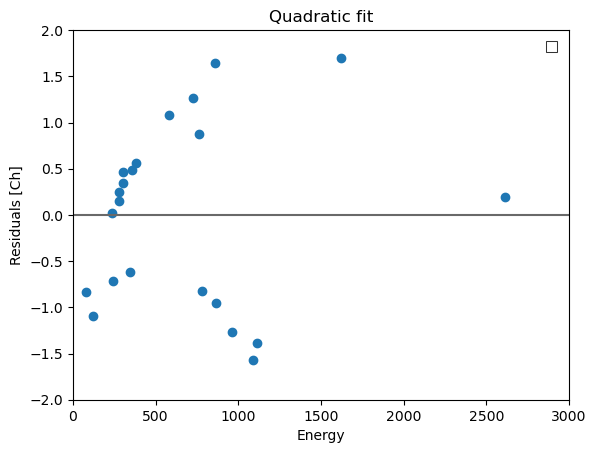

In [25]:
plt.scatter(df_calibration1.e_lit, 6*residuals_e)
plt.axhline(y=np.mean(residuals_e), color = 'dimgray')
plt.xlabel('Energy')
plt.ylabel('Residuals [Ch]')
plt.title('Quadratic fit')
#val_lim = max((np.abs(1.1*residuals_e)), np.abs(1.1*np.min(residuals_e)))
plt.xlim(0, 3000)
plt.ylim(-2, 2)
legend = plt.legend(loc=1, bbox_to_anchor=(0.99,0.99), frameon=True, shadow=False, edgecolor='black', fancybox=False)
legend.get_frame().set_linewidth(0.75)
plt.show()

In [27]:
print('MCA_ch Residual MCA_ch_error Residual_error')
out = np.array([np.array(df_calibration1.peak_position), np.array(residuals_e), 
                np.array(df_calibration1.peak_width), np.array(residuals_e_err)]).T
for el in out:
    print(str(el[0])+' '+str(el[1])+' '+str(el[2])+' '+str(el[3]))

MCA_ch Residual MCA_ch_error Residual_error
490.85614358615254 -0.13934216973433422 2.6779547256914187 0.05090201409030627
739.2981195005566 -0.18161888898802658 2.832400511792867 0.0484797100911843
1452.9906683702668 0.0036221407001448824 3.141509558576204 0.04244472773193949
1489.2287715785033 -0.11939013709684332 3.0891430560456534 0.042135726274714846
1683.5307392771117 0.04173747811302064 3.22886425745215 0.040808978677790264
1689.357801248906 0.025255323745398073 3.267483615801284 0.04536737253830071
1828.229959425114 0.0783097433218245 3.319151096928983 0.04159875875428441
1844.9600124517644 0.057664974905208055 3.2307525590301474 0.039740661665864874
2096.608283802872 -0.10351274345958927 3.351679244576803 0.03834718844858875
2169.3200455248257 0.08085265582172951 3.3905932034861412 0.038027431489139354
2339.1436804501514 0.09334666710662987 3.4093370687350557 0.03736413568101994
3555.394139289011 0.18020310998872446 3.905219921789919 0.03640013442304868
4434.746474052303 0.210

In [28]:
print('Energy Residual Energy_error Residual_error')
out = np.array([np.array(df_calibration1.e_lit), np.array(-cal_EC_a*residuals_e), 
                np.array(df_calibration1.e_err_lit), np.array(cal_EC_a*residuals_e_err)]).T
for el in out:
    print(str(el[0])+' '+str(el[1])+' '+str(el[2])+' '+str(el[3]))

Energy Residual Energy_error Residual_error
80.9971 0.8500061727070661 0.0014 0.3105092038000704
121.7817 1.1078999057812369 0.0003 0.29573282020167896
238.632 -0.022095550538696763 0.002 0.25891860762470664
244.6974 0.7282960620330733 0.0008 0.25703365674072665
276.398 -0.2546042888303897 0.002 0.24894031608756842
277.37 -0.15406090717714827 0.02 0.2767471381461828
300.089 -0.47770007696568334 0.012 0.25375808188941434
302.853 -0.35176418389261926 0.001 0.24242343712496964
344.2785 0.6314418030252174 0.0012 0.23392306111930716
356.017 -0.49321218881017564 0.002 0.23197250021002733
383.851 -0.5694273556493659 0.003 0.22792630563513908
583.187 -1.0992634614737438 0.002 0.22204576694871553
727.33 -1.2821502104442566 0.01 0.25383743643080836
763.45 -0.8857740437870805 0.02 0.2832607235812074
778.904 0.8398063384287582 0.0018 0.26006552267177135
785.37 -2.3442504661670585 0.09 0.6082476963027306
860.53 -1.6745247194872332 0.02 0.31021632571091035
867.378 0.9732114641006607 0.004 0.28840839

# Resolution

In [29]:
ratio_width_fitlit = cal_CE_a*df_calibration1.peak_width/df_calibration1.e_err_lit
ratio_width_fitlit

0     313.570851
0    1547.725360
0     257.495047
1     633.007015
1     264.655108
1      26.782056
2      45.342584
2     529.619767
2     457.869477
3     277.911284
4     186.298421
3     320.092862
4      68.736398
5      33.545420
3     381.149621
6       7.779145
7      36.771137
4     177.541376
5      41.218426
6      33.095768
7     191.931274
8     282.606824
8      98.806727
9     115.850399
dtype: float64

In [30]:
df_calibration1.peak_width

0    2.677955
0    2.832401
0    3.141510
1    3.089143
1    3.228864
1    3.267484
2    3.319151
2    3.230753
2    3.351679
3    3.390593
4    3.409337
3    3.905220
4    4.193014
5    4.092632
3    4.185116
6    4.270846
7    4.486179
4    4.332106
5    4.525884
6    4.845328
7    4.683227
8    5.171820
8    6.027345
9    7.067032
Name: peak_width, dtype: float64

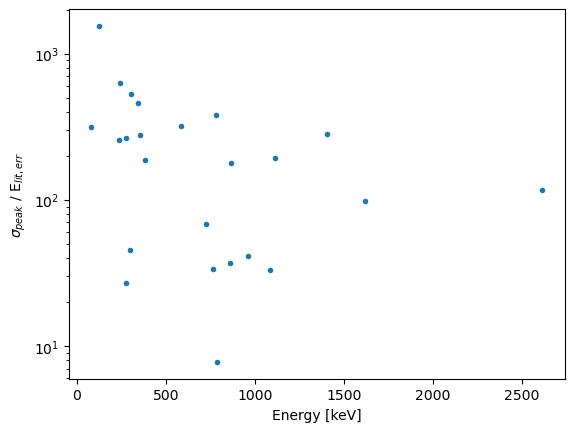

In [31]:
plt.errorbar(df_calibration1.e_lit, ratio_width_fitlit, 
            fmt = 'o', ms = 3)
#plt.axhline(y = 20, color = 'gray')
plt.yscale('log')
plt.xlabel('Energy [keV]')
plt.ylabel('$\sigma_{peak}$ / E$_{lit, err}$')
plt.show()

In [32]:
rel_resol = cal_CE_a*df_calibration1.peak_width / reconstr_e
rel_resol_err = rel_resol*np.sqrt((reconstr_e_err/reconstr_e)**2+(cal_CE_a_err/cal_CE_a)**2+(df_calibration1.peak_width_unc/df_calibration1.peak_width)**2)

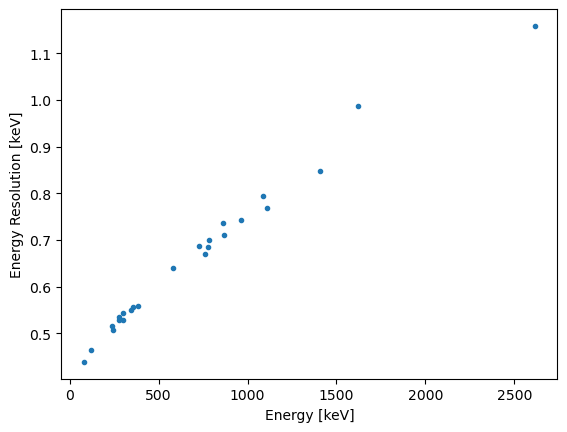

In [33]:
plt.errorbar(df_calibration1.e_lit, rel_resol*reconstr_e, yerr = rel_resol_err, xerr = df_calibration1.e_err_lit,
            fmt = 'o', ms = 3)
plt.xlabel('Energy [keV]')
plt.ylabel('Energy Resolution [keV]')
plt.show()

In [34]:
def relresolFunc(E, a,b,c):
    relresol = np.sqrt(a/E**2 + b/E + c)
    return relresol

In [35]:
popt_relresol, pcov_relresol = curve_fit(relresolFunc, df_calibration1.e_lit, rel_resol, 
                       p0=[0.1, 0.1, 0.1], 
                       bounds=((0, 0, 0),
                               (+np.inf, +np.inf, +np.inf)), 
                       sigma=rel_resol_err, maxfev=10000)
print(popt_relresol[0])
print(popt_relresol[1])
print(popt_relresol[2])
print(np.sqrt(np.diag(pcov_relresol)))
reconstr_relresol = relresolFunc(df_calibration1.e_lit, *popt_relresol)
residuals = reconstr_relresol - rel_resol
reconstr_relresol_err = 1/2*np.sqrt(popt_relresol[0]**2/df_calibration1.e_lit**4 + popt_relresol[1]**2/df_calibration1.e_lit**2 + popt_relresol[2]**2)
residuals_err = np.sqrt(reconstr_relresol_err**2 + rel_resol_err**2)
chi2 = np.sum(residuals**2 / residuals_err**2)
dof = len(residuals)-len(popt)

0.16928490488931647
0.0003783736882946037
2.305669857417798e-08
[4.75755762e-03 1.70448224e-05 1.01089239e-08]


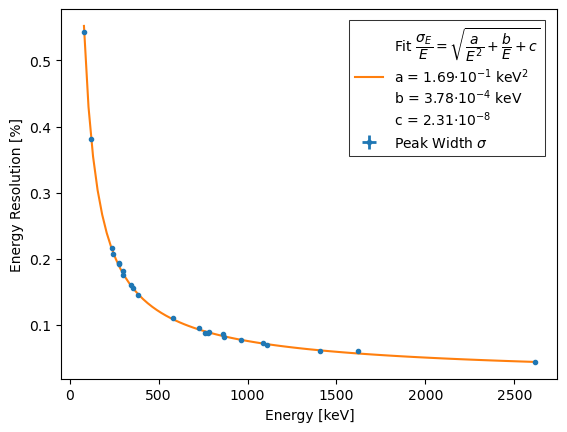

In [38]:
save_plots = True
plt.errorbar(df_calibration1.e_lit, 100*rel_resol, yerr = rel_resol_err, xerr = df_calibration1.e_err_lit,
            fmt = 'o', ms = 3, label = 'Peak Width $\sigma$', linewidth = 2)
#plt.plot(df_calibration.e_lit, relresolFunc(df_calibration.e_lit, 4.43e-1, 7.70e-4, 2.35e-7))
x_val = np.linspace(np.array(df_calibration1.e_lit)[0], np.array(df_calibration1.e_lit)[-1], 100)
plt.plot(x_val, 100*relresolFunc(x_val, *popt_relresol), label = 'Fit $\dfrac{\sigma_E}{E} = \sqrt{\dfrac{a}{E^2} + \dfrac{b}{E} +c}$'
         +'\na = '+str(round(1e1*popt_relresol[0],2))+'$\cdot 10^{-1}$ keV$^2$' 
         +'\nb = '+str(round(1e4*popt_relresol[1],2))+'$\cdot 10^{-4}$ keV' 
         +'\nc = '+str(round(1e8*popt_relresol[2],2))+'$\cdot 10^{-8}$')
#plt.xscale('log'); plt.yscale('log');
plt.xlabel('Energy [keV]')
plt.ylabel('Energy Resolution [%]')
legend = plt.legend(loc=1, bbox_to_anchor=(0.99,0.99), frameon=True, shadow=False, edgecolor='black', fancybox=False)
legend.get_frame().set_linewidth(0.75)
if save_plots:
    plt.savefig('combined_resolution_fit.png', bbox_inches='tight')
plt.show()

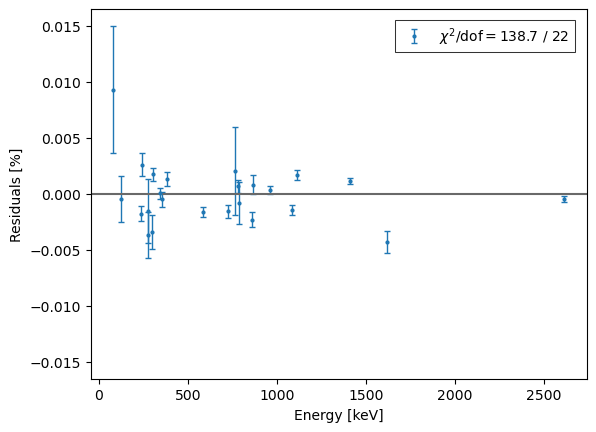

In [40]:
plt.errorbar(df_calibration1.e_lit, 100*residuals, yerr = 100*residuals_err,
             fmt='o', ms=2, capsize=2, linewidth = 1, label = '$\chi^2 / \mathrm{dof} = $'+str(round(chi2,1))+' / '+str(int(dof)))
plt.axhline(y=np.mean(residuals), color = 'dimgray')
plt.xlabel('Energy [keV]')
plt.ylabel('Residuals [%]')
val_lim = max(np.abs(100*1.1*np.max(residuals+residuals_err)), np.abs(100*1.1*np.min(residuals-residuals_err)))
plt.ylim(-val_lim, val_lim)
legend = plt.legend(loc=1, bbox_to_anchor=(0.99,0.99), frameon=True, shadow=False, edgecolor='black', fancybox=False)
legend.get_frame().set_linewidth(0.75)
if save_plots:
    plt.savefig('combined_resolution_fit_residuals.png', bbox_inches='tight')
plt.show()

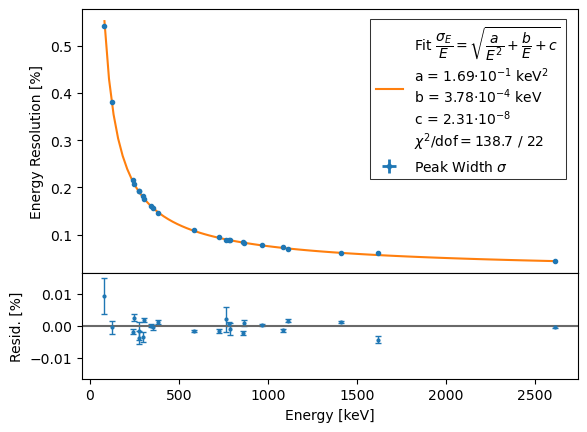

In [42]:
fig = plt.figure()
gs = gridspec.GridSpec(2, 1, height_ratios=[2.5, 1]) 

ax0 = plt.subplot(gs[0])
ax0.errorbar(df_calibration1.e_lit, 100*rel_resol, yerr = rel_resol_err, xerr = df_calibration1.e_err_lit,
            fmt = 'o', ms = 3, label = 'Peak Width $\sigma$', linewidth = 2)
x_val = np.linspace(np.array(df_calibration1.e_lit)[0], np.array(df_calibration1.e_lit)[-1], 100)
ax0.plot(x_val, 100*relresolFunc(x_val, *popt_relresol), label = 'Fit $\dfrac{\sigma_E}{E} = \sqrt{\dfrac{a}{E^2} + \dfrac{b}{E} +c}$'
         +'\na = '+str(round(1e1*popt_relresol[0],2))+'$\cdot 10^{-1}$ keV$^2$' 
         +'\nb = '+str(round(1e4*popt_relresol[1],2))+'$\cdot 10^{-4}$ keV' 
         +'\nc = '+str(round(1e8*popt_relresol[2],2))+'$\cdot 10^{-8}$'
         +'\n$\chi^2 / \mathrm{dof} = $'+str(round(chi2,1))+' / '+str(int(dof)))
ax0.set_ylabel('Energy Resolution [%]')

ax1 = plt.subplot(gs[1], sharex = ax0)
ax1.errorbar(df_calibration1.e_lit, 100*residuals, yerr = 100*residuals_err,
             fmt='o', ms=2, capsize=2, linewidth = 1, label = '$\chi^2 / \mathrm{dof} = $'+str(round(chi2,1))+' / '+str(int(dof)))
ax1.axhline(y=np.mean(residuals), color = 'dimgray')
plt.setp(ax0.get_xticklabels(), visible=False)
yticks = ax1.yaxis.get_major_ticks()
#yticks[-1].label1.set_visible(False)
ax1.set_xlabel('Energy [keV]')
ax1.set_ylabel('Resid. [%]')
val_lim = max(np.abs(100*1.1*np.max(residuals+residuals_err)), np.abs(100*1.1*np.min(residuals-residuals_err)))
ax1.set_ylim(-val_lim, val_lim)
#ax1.set_yticks(np.arange(-0.15, 0.16, step=0.15))
#plt.xlim(0, 16383)

legend = ax0.legend(loc=1, bbox_to_anchor=(0.99,0.99), frameon=True, shadow=False, edgecolor='black', fancybox=False)
legend.get_frame().set_linewidth(0.75)

plt.subplots_adjust(hspace=.0)
if save_plots:
    plt.savefig('combined_resolution_fit_residuals.png', bbox_inches='tight')
plt.show()

In [43]:
resol = df_calibration1.peak_width
resol_err = df_calibration1.peak_width_unc

In [44]:
def resolFunc(E, a,b,c):
    resol = np.sqrt(a*(E**2) + b*E + c)
    return resol

In [45]:
popt_relresol[2], popt_relresol[1]/cal_CE_a, popt_relresol[0]/cal_CE_a**2

(2.305669857417798e-08, 0.0023081309215547876, 6.299371995816567)

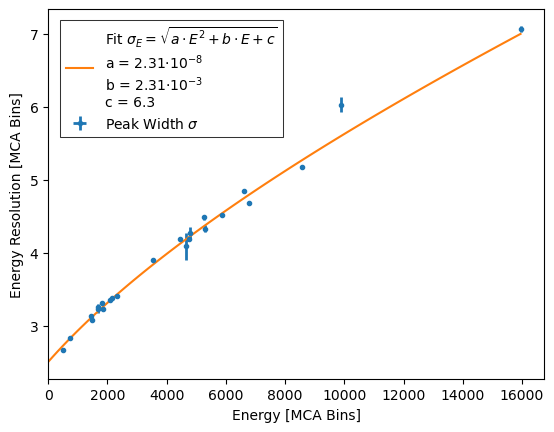

In [46]:
plt.errorbar(df_calibration1.peak_position, resol, yerr = resol_err, xerr = df_calibration1.peak_position_unc,
            fmt = 'o', ms = 3, label = 'Peak Width $\sigma$', linewidth = 2)
x_val = np.linspace(0, np.array(df_calibration1.peak_position)[-1], 100)
plt.plot(x_val, resolFunc(x_val, popt_relresol[2], popt_relresol[1]/cal_CE_a, popt_relresol[0]/cal_CE_a**2), 
         label = 'Fit $\sigma_E = \sqrt{a \cdot E^2 + b \cdot E +c}$'
         +'\na = '+str(round(1e8*popt_relresol[2],2))+'$\cdot 10^{-8}$' 
         +'\nb = '+str(round(1e3*popt_relresol[1]/cal_CE_a,2))+'$\cdot 10^{-3}$' 
         +'\nc = '+str(round(1e0*popt_relresol[0]/cal_CE_a**2,2)))
#plt.xscale('log'); plt.yscale('log');
plt.xlabel('Energy [MCA Bins]')
plt.ylabel('Energy Resolution [MCA Bins]')
plt.xlim(left = 0)
legend = plt.legend(loc=2, bbox_to_anchor=(0.01,0.99), frameon=True, shadow=False, edgecolor='black', fancybox=False)
legend.get_frame().set_linewidth(0.75)
if save_plots:
    plt.savefig('combined_resolution_fit_ADC.png', bbox_inches='tight')
plt.show()

In [47]:
residuals_conv = residuals*df_calibration1.e_lit
residuals_err_conv = residuals_err*df_calibration1.e_lit

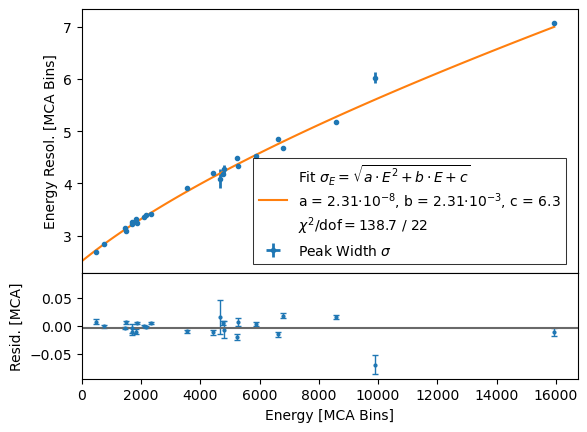

In [48]:
fig = plt.figure()
gs = gridspec.GridSpec(2, 1, height_ratios=[2.5, 1]) 

ax0 = plt.subplot(gs[0])
ax0.errorbar(df_calibration1.peak_position, resol, yerr = resol_err, xerr = df_calibration1.peak_position_unc,
            fmt = 'o', ms = 3, label = 'Peak Width $\sigma$', linewidth = 2)
x_val = x_val = np.linspace(0, np.array(df_calibration1.peak_position)[-1], 100)
ax0.plot(x_val, resolFunc(x_val, popt_relresol[2], popt_relresol[1]/cal_CE_a, popt_relresol[0]/cal_CE_a**2), 
         label = 'Fit $\sigma_E = \sqrt{a \cdot E^2 + b \cdot E +c}$'
         +'\na = '+str(round(1e8*popt_relresol[2],2))+'$\cdot 10^{-8}$' 
         +', b = '+str(round(1e3*popt_relresol[1]/cal_CE_a,2))+'$\cdot 10^{-3}$' 
         +', c = '+str(round(1e0*popt_relresol[0]/cal_CE_a**2,2))
         +'\n$\chi^2 / \mathrm{dof} = $'+str(round(chi2,1))+' / '+str(int(dof)))
ax0.set_ylabel('Energy Resol. [MCA Bins]')
ax0.set_xlim(left = 0)

ax1 = plt.subplot(gs[1], sharex = ax0)
ax1.errorbar(df_calibration1.peak_position, residuals_conv, yerr = residuals_err_conv,
             fmt='o', ms=2, capsize=2, linewidth = 1, label = '$\chi^2 / \mathrm{dof} = $'+str(round(chi2,1))+' / '+str(int(dof)))
ax1.axhline(y=np.mean(residuals_conv), color = 'dimgray')
plt.setp(ax0.get_xticklabels(), visible=False)
yticks = ax1.yaxis.get_major_ticks()
#yticks[-1].label1.set_visible(False)
ax1.set_xlabel('Energy [MCA Bins]')
ax1.set_ylabel('Resid. [MCA]')
val_lim = max(np.abs(1.1*np.max(residuals_conv+residuals_err_conv)), np.abs(1.1*np.min(residuals_conv-residuals_err_conv)))
ax1.set_ylim(-val_lim, val_lim)
ax1.set_xlim(left = 0)
#ax1.set_yticks(np.arange(-0.15, 0.16, step=0.15))
#plt.xlim(0, 16383)

legend = ax0.legend(loc=4, bbox_to_anchor=(0.99,0.01), frameon=True, shadow=False, edgecolor='black', fancybox=False)
legend.get_frame().set_linewidth(0.75)

plt.subplots_adjust(hspace=.0)
if save_plots:
    plt.savefig('combined_resolution_fit_residuals_adc.png', bbox_inches='tight')
plt.show()

In [49]:
print('MCA_ch Resolution MCA_ch_error Resolution_error')
out = np.array([np.array(df_calibration1.peak_position), np.array(resol), 
                np.array(df_calibration1.peak_width), np.array(resol_err)]).T
for el in out:
    print(str(el[0])+' '+str(el[1])+' '+str(el[2])+' '+str(el[3]))

MCA_ch Resolution MCA_ch_error Resolution_error
490.85614358615254 2.6779547256914187 2.6779547256914187 0.0272472373594334
739.2981195005566 2.832400511792867 2.832400511792867 0.0145816746343524
1452.9906683702668 3.141509558576204 3.141509558576204 0.0097607111242885
1489.2287715785033 3.0891430560456534 3.0891430560456534 0.015241857998604
1683.5307392771117 3.22886425745215 3.22886425745215 0.0487643212551406
1689.357801248906 3.267483615801284 3.267483615801284 0.0347285990190771
1828.229959425114 3.319151096928983 3.319151096928983 0.0278103254046169
1844.9600124517644 3.2307525590301474 3.2307525590301474 0.0111168756080832
2096.608283802872 3.351679244576803 3.351679244576803 0.0097829671934212
2169.3200455248257 3.3905932034861412 3.3905932034861412 0.0141204567583944
2339.1436804501514 3.4093370687350557 3.4093370687350557 0.0144386176552008
3555.394139289011 3.905219921789919 3.905219921789919 0.0157534564662401
4434.746474052303 4.193013714145492 4.193013714145492 0.026755

In [50]:
print('MCA_ch Residual MCA_ch_error Residual_error')
out = np.array([np.array(df_calibration1.peak_position), np.array(residuals_conv), 
                np.array(df_calibration1.peak_width), np.array(residuals_err_conv)]).T
for el in out:
    print(str(el[0])+' '+str(el[1])+' '+str(el[2])+' '+str(el[3]))

MCA_ch Residual MCA_ch_error Residual_error
490.85614358615254 0.007551045329647903 2.6779547256914187 0.004607134777763538
739.2981195005566 -0.0005696682378491033 2.832400511792867 0.002507154219215516
1452.9906683702668 -0.0042084087512750746 3.141509558576204 0.0016529011431105373
1489.2287715785033 0.006428588750362593 3.0891430560456534 0.002532601638194803
1683.5307392771117 -0.00422737471969251 3.22886425745215 0.008001375193513184
1689.357801248906 -0.010227466526945537 3.267483615801284 0.005704604335311045
1828.229959425114 -0.010202234011934437 3.319151096928983 0.004571220759421636
1844.9600124517644 0.00526257273647646 3.2307525590301474 0.0018548955042549794
2096.608283802872 0.00019469643698284865 3.351679244576803 0.001635750369633294
2169.3200455248257 -0.0016974837351305262 3.3905932034861412 0.0023353459586851603
2339.1436804501514 0.005085661891527692 3.4093370687350557 0.002385222005859158
3555.394139289011 -0.00928259678907639 3.905219921789919 0.0025935535376024